In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dans l'algorithme de gradient descent, on créé une suite de $w_k$ qui tend vers $w^*$

On commence la suite pour  $w_0 = w$ fixé

On sélectionne un $x_i$ aléatoirement dans l'ensemble des $x_i$, et on itère comme suit : 

$w_{k+1} = w_k + \nabla_w (y_i - w_k^t)^2$

$w_{k+1} = w_{k} + 2x_i^t(y_i- w_k ^t x_i) \eta_k$, with $\eta_k$ une suite décroissante de limite nulle. 

On s'arrête lorsqu'on a atteint un seuil fixé : $w_{k+1} - w_k < \epsilon$

In [64]:
def stochastic_gradient_descent(X: np.array, Y : np.array, epsilon: float , eta: float, w_zero : np.array) : 
    w_k = w_zero
    w_k1 =w_zero + 1
    n= X.shape[0]
    while np.linalg.norm((w_k - w_k1)/np.linalg.norm(w_k)) > epsilon:
        w_k=w_k1
        i = np.random.randint(0,n)
        x_i = X[i]
        y_i = Y[i]
        # print(y_i)
        # print(np.dot(x_i,w_k))
        gradient = 2 * x_i * (np.dot(x_i,w_k) - y_i)
        w_k1 = w_k - eta * gradient
    return w_k1

In [65]:
w_star=np.array([1,-1]) # our target w 

Xs=np.random.rand(100,2) # 100 points  in 2D
for i in range(len(Xs)):

    Xs[i][0]+=-0.5
    Xs[i][1]+=-0.5

ys=[]
for i in range(len(Xs)):
    if np.dot(Xs[i],w_star) > 0:
        ys.append(1)
    else:
        ys.append(-1)
ys=np.array(ys)


xs_x=np.array([x[0]  for x in Xs])
xs_y=np.array([x[1]  for x in Xs])

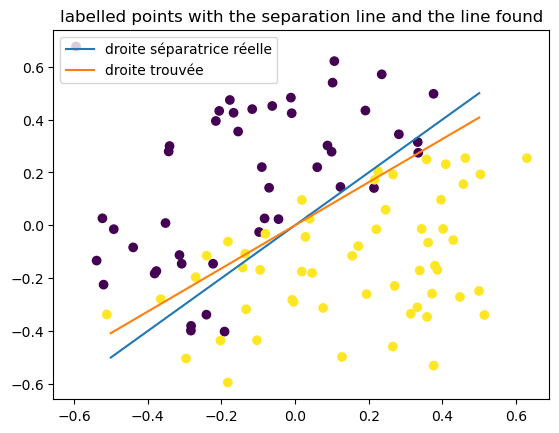

0.9948831409866742


In [137]:
w_found = stochastic_gradient_descent(Xs,ys,0.00001,0.1,np.array([1,5]))
plt.scatter(xs_x, xs_y, c=ys)
x = np.linspace(-0.5,0.5,100)
y = -w_star[0]/w_star[1]*x
y_found=-w_found[0]/w_found[1]*x
plt.plot(x,y, label='droite séparatrice réelle')
plt.plot(x,y_found, label='droite trouvée')
plt.title('labelled points with the separation line and the line found')
plt.legend()
plt.show()

print(np.dot(w_star,w_found)/(np.linalg.norm(w_star)*np.linalg.norm(w_found))) # cosine similarity

We notice that with a small tolerance $\epsilon$, $w^*$ often lands near to $w$. However, with a bigger one, the results can be very far. 

In [163]:

Xs=np.random.rand(100,2) # 100 points  in 2D
noise = 0.3 # noise level

for i in range(len(Xs)):
    Xs[i][0]+=-0.5  
    Xs[i][1]+=-0.5 


# Classification : 
ys=[] 
for i in range(len(Xs)):
    if np.dot(Xs[i],w_star) > 0:
        ys.append(1)
    else:
        ys.append(-1)
ys=np.array(ys)

# Adding noise
for i in range(len(Xs)):
    Xs[i][0]+=np.random.normal(0,noise)
    Xs[i][1]+=np.random.normal(0,noise)




xs_x=np.array([x[0]  for x in Xs])
xs_y=np.array([x[1]  for x in Xs])

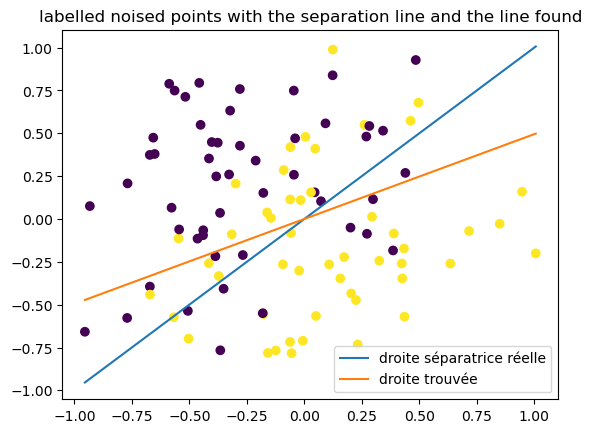

0.9474401850762194


In [140]:
w_found=stochastic_gradient_descent(Xs,ys,0.00001,0.1,np.array([1,5]))
plt.scatter(xs_x, xs_y, c=ys)
x = np.linspace(min(xs_x),max(xs_x),100)
y = -w_star[0]/w_star[1]*x
y_found=-w_found[0]/w_found[1]*x
plt.plot(x,y, label='droite séparatrice réelle')
plt.plot(x,y_found, label='droite trouvée')
plt.title('labelled noised points with the separation line and the line found')
plt.legend()
plt.show()
print(np.dot(w_star,w_found)/(np.linalg.norm(w_star)*np.linalg.norm(w_found))) # cosine similarity

The cosine similarity between teh two vectors is quite the same despite the noise. 

In [162]:

data = pd.read_csv('wdbc.data', header=None)
labels = data[1]
labels = labels.replace('M',1)
labels = labels.replace('B',-1)
Xs=np.array(data.drop([0,1],axis=1))


x_train, x_test = Xs[:400], Xs[400:]
y_train, y_test = labels[:400], labels[400:]

w_found=stochastic_gradient_descent(x_train,y_train,0.00001,0.1,np.random.rand(30))
y_pred = np.sign(np.dot(x_test,w_found))
accuracy = np.mean(y_pred == y_test)
print('The accuracy is of ' + str(accuracy))


The accuracy is of 0.7692307692307693
